In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path_results= "outputs/" 
file_results="results_no_5_features_DS_noCovalentLigand.xlsx"
radius="_13_3"
models_list=["LR",'GPR','SVR','KNR',"RF","XGB"]
output_path="figure/boxplot/"

In [4]:
MAE_dict=dict()
for model in models_list:
    df_data=pd.read_excel(path_results+file_results).drop("Unnamed: 0", axis=1).set_index("name_model_radius")
    MAE_test_list=df_data.loc[model+radius]["Mae_test_list"][1:-1]
    MAE_test_list_float=[float(el) for el in MAE_test_list.split(",")]
    MAE_dict[model]=MAE_test_list_float

In [5]:
df_MAE=pd.DataFrame.from_dict(MAE_dict,orient='columns')
df_MAE

,LR,GPR,SVR,KNR,RF,XGB
0,58.318404,46.403851,40.720964,55.819545,52.237019,48.589206
1,44.690691,40.461131,39.928407,59.735714,40.974901,37.573943
2,40.593434,30.825161,33.811033,33.016851,36.308541,35.999120
3,46.599474,37.967204,39.202790,44.802355,42.848475,37.119415
4,33.698155,30.124193,31.877138,43.935185,24.527529,29.584086
5,39.297309,27.765894,31.429725,40.375611,38.827413,32.387632
6,50.828178,41.633305,38.881787,34.357709,35.992329,31.643936
7,48.053359,45.290723,41.047075,42.539770,44.600950,37.859777
8,37.040997,26.663403,26.048411,36.074074,26.989685,22.015799
9,54.847239,49.112916,43.603551,55.474161,53.670387,46.313620


AttributeError: 'Figure' object has no attribute 'plt'

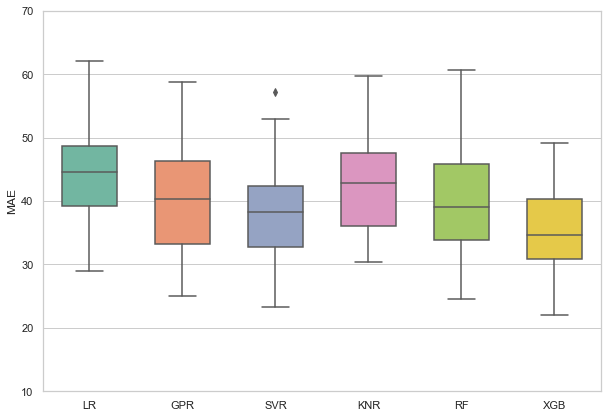

In [17]:
f = plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid",palette="Set2")    
a=sns.boxplot(data=df_MAE,width=0.6).set(ylabel="MAE", ylim=(10,70))
f.savefig(output_path + "boxplot_MAE" + radius + ".svg")

In [7]:
best_models_dict=dict()
for estimator in models_list:
    df_data=pd.read_excel(path_results+file_results).drop("Unnamed: 0", axis=1).set_index("name_model_radius")
    df_estimator=df_data[df_data["estimator"]== estimator]
    best_radius=df_estimator["MAE_test"].idxmin()
    MAE_test_list=df_data.loc[best_radius]["Mae_test_list"][1:-1]
    MAE_test_list_float=[float(el) for el in MAE_test_list.split(",")]
    best_models_dict[best_radius]=MAE_test_list_float

In [8]:
df_best_models=pd.DataFrame.from_dict(best_models_dict,orient='columns')

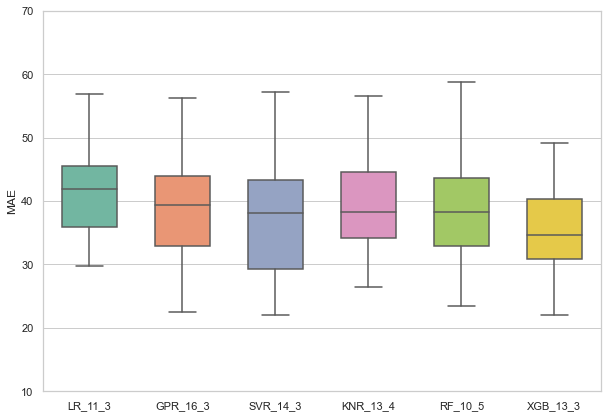

In [9]:
f= plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid",palette="Set2")    
sns.boxplot(data=df_best_models,width=0.6).set(ylabel="MAE",ylim=(10,70))
f.savefig(output_path + "boxplot_MAE" + ".svg")